In [7]:
import pandas as pd

In [8]:
df = pd.read_csv('heart.csv')

In [9]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [10]:
from sklearn.model_selection import train_test_split
feature_columns = ['age','sex','cp','trestbps','chol','restecg','thalach','exang','oldpeak','slope','ca','thal']

In [11]:
x = df[feature_columns]
y = df.target

In [12]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=0)
X_train.shape

(820, 12)

In [13]:
X_test.shape

(205, 12)

In [14]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(max_iter = 1000, random_state = 0)
log_reg.fit (X_train,y_train)

LogisticRegression(max_iter=1000, random_state=0)

In [15]:
y_pred = log_reg.predict(X_test)

In [ ]:
from sklearn import metrics
confusion_matrix_outcome = metrics.confusion_matrix(y_test, y_pred)

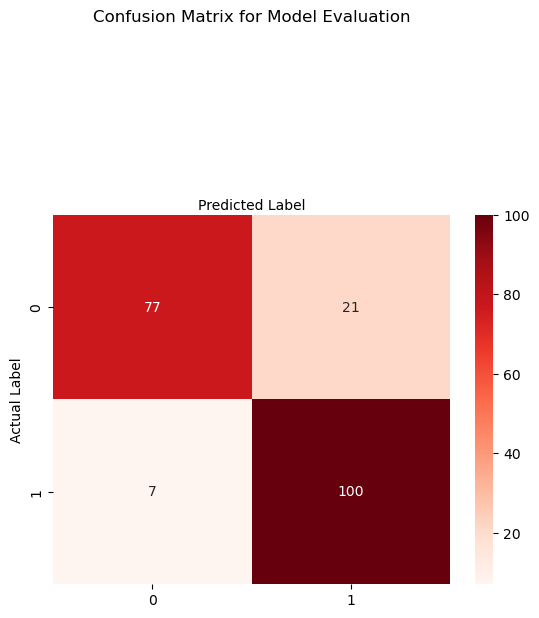

In [28]:
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
names_detail = ['0', '1'] 
fig, ax = plt.subplots()
plt.xticks(np.arange(len(names_detail)), names_detail)
plt.yticks(np.arange(len(names_detail)), names_detail)
sns.heatmap(pd.DataFrame(confusion_matrix_outcome), annot=True, cmap="Reds", fmt='g')
ax.xaxis.set_label_position("top")
plt.title('Confusion Matrix for Model Evaluation', y=1.5)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

In [30]:
print("Accuracy of the developed model is:",metrics.accuracy_score(y_test, y_pred))
print("Precision of the developed model is:",metrics.precision_score(y_test, y_pred))
print("Recall of the developed model is:",metrics.recall_score(y_test, y_pred))

Accuracy of the developed model is: 0.8634146341463415
Precision of the developed model is: 0.8264462809917356
Recall of the developed model is: 0.9345794392523364


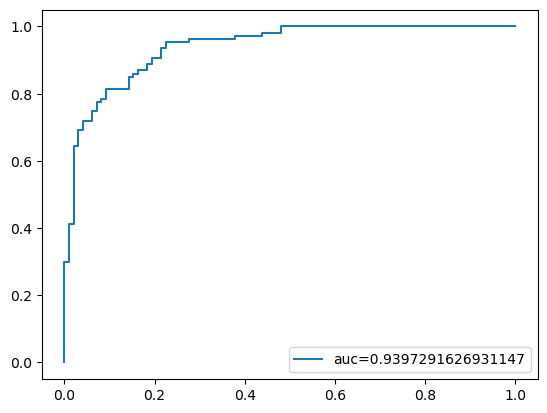

In [32]:
y_prediction_probability = log_reg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_prediction_probability)
auc = metrics.roc_auc_score(y_test, y_prediction_probability)
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend(loc=4)
plt.show()